In [1]:
from __future__ import print_function
import keras
from keras.models import Sequential, Model, load_model
from keras import backend as K

import tensorflow as tf

import os
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from aparent.predictor import *


Using TensorFlow backend.


<h2>Load the Basic- and APADB-tuned APARENT model</h2>
<br/>
-- Load the basic APARENT model, which has been trained to predict the isoform abundance and cut profile of a proximal PAS given a fixed background distal PAS (trained on random 3' UTR APA MPRA data).<br/>
-- Load the APADB-fitted APARENT model, composed of two siamese APARENT networks which score the proximal and distal PASs. Linear regression of the proximal and distal scores are used to infer the relative APA isoform abundance (fitted on human pooled-tissue APADB data).
<br/>

In [2]:
#Load base APARENT model and input encoder

aparent_model = load_model('../saved_models/aparent_large_lessdropout_all_libs_no_sampleweights.h5')
aparent_encoder = get_aparent_encoder()

#Load APADB-tuned APARENT model and input encoder

apadb_model = load_model('../saved_models/aparent_apadb_fitted_large_lessdropout_no_sampleweights.h5')
apadb_encoder = get_apadb_encoder()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/home/jlinder2/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


<h2>Example 1: PSMC6 Gene APA prediction</h2>
<br/>
-- First predict the non-normalized isoform score of each PAS sequence (score is relative to the average random MPRA distal bias).<br/>
-- Then predict the relative APA isoform abundance using the APADB-fitted model.<br/>

Non-normalized proximal sum-cut logit = 2.0683621599430855
Non-normalized distal sum-cut logit = 1.7659051664973766

Predicted proximal vs. distal isoform % (APADB) = 0.7347698


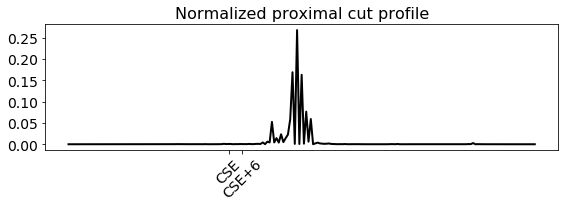

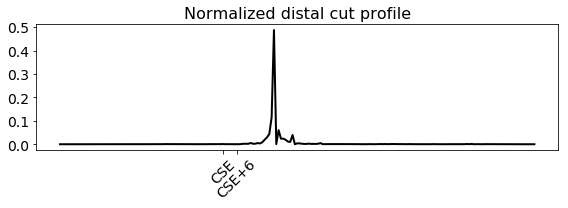

In [3]:
#Example APA sites from APADB (gene = PSMC6)

#Proximal and Distal PAS Sequences
seq_prox = 'AGATAGTGGTATAAGAAAGCATTTCTTATGACTTATTTTGTATCATTTGTTTTCCTCATCTAAAAAGTTGAATAAAATCTGTTTGATTCAGTTCTCCTACATATATATTCTTGTCTTTTCTGAGTATATTTACTGTGGTCCTTTAGGTTCTTTAGCAAGTAAACTATTTGATAACCCAGATGGATTGTGGATTTTTGAATATTAT'
seq_dist = 'TGGATTGTGGATTTTTGAATATTATTTTAAAATAGTACACATACTTAATGTTCATAAGATCATCTTCTTAAATAAAACATGGATGTGTGGGTATGTCTGTACTCCTCCTTTCAGAAAGTGTTTACATATTCTTCATCTACTGTGATTAAGCTCATTGTTGGTTAATTGAAAATATACATGCACATCCATAACTTTTTAAAGAGTA'

#Site Distance
site_distance = 180

#Proximal and Distal cut intervals within each sequence defining the isoforms
prox_cut_start, prox_cut_end = 80, 105
dist_cut_start, dist_cut_end = 80, 105

#Predict with base APARENT model
_, cut_pred_prox = aparent_model.predict(x=aparent_encoder([seq_prox]))
_, cut_pred_dist = aparent_model.predict(x=aparent_encoder([seq_dist]))

print("Non-normalized proximal sum-cut logit = " + str(logit(np.sum(cut_pred_prox[0, prox_cut_start:prox_cut_end]))))
print("Non-normalized distal sum-cut logit = " + str(logit(np.sum(cut_pred_dist[0, dist_cut_start:dist_cut_end]))))
print("")

#Predict with APADB-tuned APARENT model
iso_pred, cut_prox, cut_dist = apadb_model.predict(x=apadb_encoder([seq_prox], [seq_dist], [prox_cut_start], [prox_cut_end], [dist_cut_start], [dist_cut_end], [site_distance]))

print("Predicted proximal vs. distal isoform % (APADB) = " + str(iso_pred[0, 0]))

f = plt.figure(figsize=(8, 3))
plt.plot(np.arange(205), np.ravel(cut_prox), linewidth=2, color='black')
plt.title("Normalized proximal cut profile", fontsize=16)
plt.xticks([70, 76], ['CSE', 'CSE+6'], fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

f = plt.figure(figsize=(8, 3))
plt.plot(np.arange(205), np.ravel(cut_dist), linewidth=2, color='black')
plt.title("Normalized distal cut profile", fontsize=16)
plt.xticks([70, 76], ['CSE', 'CSE+6'], fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

<h2>Example 2: KTN1 Gene APA prediction</h2>
<br/>
-- First predict the non-normalized isoform score of each PAS sequence (score is relative to the average random MPRA distal bias).<br/>
-- Then predict the relative APA isoform abundance using the APADB-fitted model.<br/>
<br/>

Non-normalized proximal sum-cut logit = 0.9036160519612204
Non-normalized distal sum-cut logit = 3.7380916827966546

Predicted proximal vs. distal isoform % (APADB) = 0.1678305


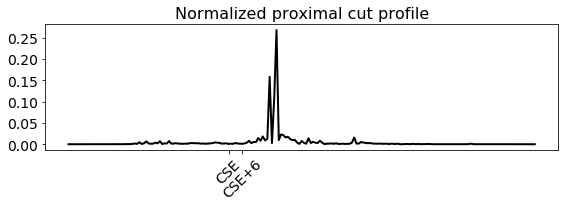

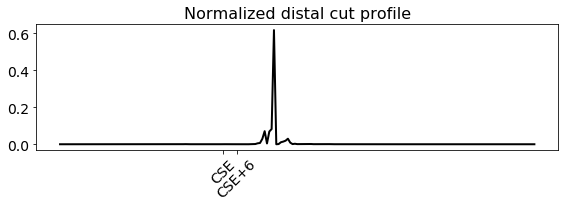

In [4]:
#Example APA sites from APADB (gene = KTN1)

seq_prox = 'AAAACTGTTTGAATAATTAGACCTTTACATTCCTGAAGATAAACATGTAATCTTTTATCTTATTTTGCTCAATAAAATTGTTCAGAAGATCAAAGTGGTAAAGACAATGTAAAATTTAACATTTTAATACTGATGTTGTACACTGTTTTACTTAACATTTTGGGAAGTAACTGCCTCTGACTTCAACTCAAGAAAACACTTTTTT'
seq_dist = 'GCCTCTGACTTCAACTCAAGAAAACACTTTTTTGTTGCTAATGTAATCGGTTTTTGTAATGGCGTCAGCAAATAAAAGGATGCTTATTATTCAAACTTGACTTGTTCTAATTTTTATTGAGCTTTAACAGATTTCATTAGTAGTACAGATCATTGTAATTTAGAATACAGCTATTAATTGGCAACCATTCAACAAGATAGGTTTA'

#Site Distance
site_distance = 171

#Proximal and Distal cut intervals within each sequence defining the isoforms
prox_cut_start, prox_cut_end = 70, 105
dist_cut_start, dist_cut_end = 70, 105

#Predict with base APARENT model
_, cut_pred_prox = aparent_model.predict(x=aparent_encoder([seq_prox]))
_, cut_pred_dist = aparent_model.predict(x=aparent_encoder([seq_dist]))

print("Non-normalized proximal sum-cut logit = " + str(logit(np.sum(cut_pred_prox[0, prox_cut_start:prox_cut_end]))))
print("Non-normalized distal sum-cut logit = " + str(logit(np.sum(cut_pred_dist[0, dist_cut_start:dist_cut_end]))))
print("")

#Predict with APADB-tuned APARENT model
iso_pred, cut_prox, cut_dist = apadb_model.predict(x=apadb_encoder([seq_prox], [seq_dist], [prox_cut_start], [prox_cut_end], [dist_cut_start], [dist_cut_end], [site_distance]))

print("Predicted proximal vs. distal isoform % (APADB) = " + str(iso_pred[0, 0]))

f = plt.figure(figsize=(8, 3))
plt.plot(np.arange(205), np.ravel(cut_prox), linewidth=2, color='black')
plt.title("Normalized proximal cut profile", fontsize=16)
plt.xticks([70, 76], ['CSE', 'CSE+6'], fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

f = plt.figure(figsize=(8, 3))
plt.plot(np.arange(205), np.ravel(cut_dist), linewidth=2, color='black')
plt.title("Normalized distal cut profile", fontsize=16)
plt.xticks([70, 76], ['CSE', 'CSE+6'], fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()
